<a href="https://colab.research.google.com/github/praveentn/hgwxx7/blob/master/transferlearning/obj_detection_frcnn_resnet_detecto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install detecto

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


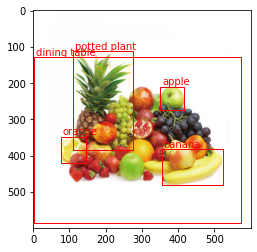

In [2]:
from detecto import core, utils, visualize

image = utils.read_image('https://www.hellocig.com/media/catalog/product/cache/1/image/600x/9df78eab33525d08d6e5fb8d27136e95/f/r/fruits_1.jpg')
model = core.Model()

labels, boxes, scores = model.predict_top(image)
visualize.show_labeled_image(image, boxes, labels)

In [3]:
import torch

print(torch.cuda.is_available())

True


In [4]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/Detecto')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
pwd

'/content/drive/My Drive/Detecto'

In [6]:
!git clone https://github.com/praveentn/02085620.git

Cloning into '02085620'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (611/611), done.
remote: Compressing objects: 100% (312/312), done.
remote: Total 611 (delta 299), reused 611 (delta 299), pack-reused 0
Receiving objects: 100% (611/611), 10.92 MiB | 12.26 MiB/s, done.
Resolving deltas: 100% (299/299), done.
Checking out files: 100% (606/606), done.


In [7]:
ls

02085620/


In [8]:
cd 02085620

/content/drive/My Drive/Detecto/02085620


In [9]:
ls

images/  train_labels/  val_labels/


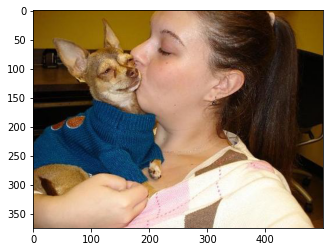

In [10]:
import matplotlib.pyplot as plt
from detecto.utils import read_image

image = read_image('/content/drive/My Drive/Detecto/02085620/images/n02085620_1816.jpg')
plt.imshow(image)
plt.show()

In [0]:
# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/content/drive/My Drive/Detecto/02085620'

os.chdir(WORKING_DIRECTORY)

In [12]:
pwd

'/content/drive/My Drive/Detecto/02085620'

In [0]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

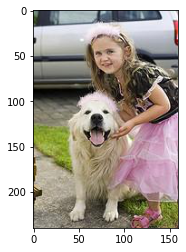

In [14]:
image = utils.read_image('images/n02099601_2076.jpg')
plt.imshow(image)
plt.show()

In [15]:
# Do this twice: once for our training labels and once for our validation labels
utils.xml_to_csv('train_labels', 'train.csv')
utils.xml_to_csv('val_labels', 'val.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax
0,n02085620_11140.jpg,500,375,Chihuahua,17,38,451,253
1,n02085620_11337.jpg,300,225,Chihuahua,59,37,229,179
2,n02085620_11696.jpg,800,600,Chihuahua,211,0,696,516
3,n02085620_1205.jpg,500,375,Chihuahua,146,0,350,239
4,n02085620_12334.jpg,299,415,Chihuahua,159,186,250,330
...,...,...,...,...,...,...,...,...
75,n02099601_825.jpg,500,375,golden_retriever,94,88,327,353
76,n02099601_8429.jpg,464,348,golden_retriever,68,6,392,347
77,n02099601_864.jpg,500,376,golden_retriever,54,40,394,347
78,n02099601_9504.jpg,500,375,golden_retriever,0,0,499,347


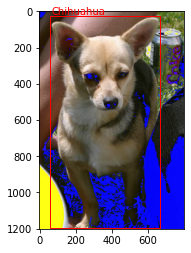

In [16]:
# Specify a list of transformations for our dataset to apply on our images
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('train.csv', 'images/', transform=transform_img)

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Epoch 1 of 10
Loss: 0.20330557357519866
Epoch 2 of 10
Loss: 0.1274592276196927
Epoch 3 of 10
Loss: 0.1150826490484178
Epoch 4 of 10
Loss: 0.09244246608577669
Epoch 5 of 10
Loss: 0.08792795471381396
Epoch 6 of 10
Loss: 0.0835487000644207
Epoch 7 of 10
Loss: 0.08300854396075011
Epoch 8 of 10
Loss: 0.08298927992582321
Epoch 9 of 10
Loss: 0.08179100432898849
Epoch 10 of 10
Loss: 0.08209847721736878


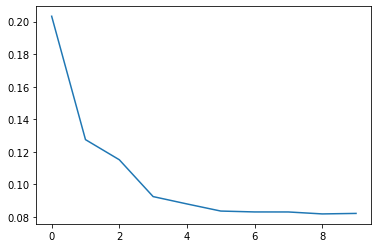

In [17]:
# Create our validation dataset
val_dataset = core.Dataset('val.csv', 'images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['Chihuahua', 'golden_retriever'])

# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=10, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()

In [18]:
# Specify the path to your image
image = utils.read_image('images/n02085620_712.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions

# ['alien', 'bat', 'bat']
print(labels) 

#           xmin       ymin       xmax       ymax
# tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
#         [ 276.2478,  144.0074,  579.6044,  508.7444],
#         [ 277.2929,  162.6719,  627.9399,  511.9841]])
print(boxes)

# tensor([0.9952, 0.9837, 0.5153])
print(scores)

['Chihuahua', 'golden_retriever']
tensor([[ 94.1274,  52.6152, 397.2513, 325.9607],
        [ 75.4146,  68.6436, 454.0717, 351.6548]])
tensor([0.9722, 0.2664])


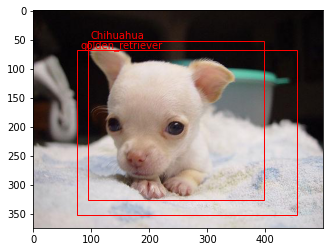

In [19]:
visualize.show_labeled_image(image, boxes, labels)